# SYD DAT 4 Project : Hospital Readmissions prediction

### Overview 

Hospital readmission means when a patient is re-admitted to a hospital within short period(usually 28/30 days)after first time or initial discharge. Such readmissions are major health care concern for most countries like US, UK, Australia and many others. This leads to increased wait times, increased medical errors resulting in risking patient safety and unncessary deaths. High readmission rate is infact an indicator of poor quality care of the hospital. It also put huge monetary burden on the hospitals as well as government. In this project, I want to identify patients who are likely to be readmitted to the hopsital. By doing this, proper care and management of such patients can be planned by their care providers.

### Goal : 
Predict if a patient will be readmitted to the hospital or not?

OR

Cluster patients into high risk or low risk categories.

### Data set used : 
Diabetes 130-US hospitals for years 1999-2008 Data Set. This is a public available database by Center for Clinical and Translational Research, Virginia Commonwealth University. This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO).

http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

### Summary of data : 

From the below python code, following observations are made :-
 * There are 50 features and 101766 observations.
 * Each row in dataframe represents one hospital admission. On an average, there are 5 hospitalizations for each patient (patient_nbr is the de-identifed patient ID)
 * Some of the features have non-numeric values, e.g.: race, gender, age is in range, medications like citoglipton, insulin, etc,. So need to transform them.
 * Top 3 admission types(admission_type_id) are Emergency(53%), Elective(18%) and Urgent(18%).
 * 60% of hospitalizations have resulted in discharge to home, 13% transferred to skilled nursing care, 12% transferred to another inpatient facility
 * More than 50% of hospitalizations are from Emergency Room, followed by Physician Referral(29%) as seen from  admission_source_id feature.
 * The average amount of time spent(time_in_hospital) in a hospital is 4 days and there is a good variation in this feature ranging from 1 day to 14 days.
 * Number of lab procedures conducted during the stay is on an average 43, and it ranges from 1 to 132.
 * The average number of medications administered is 16 with minimum 1 and maximum of 81 medications.
 * Features diag_1, diag_2, diag_3 indicate what other diseases the patients may have. I need to map the codes (ICD codes which are International Code of Disease) into simpler and understandable names. I can do this mapping as I worked with ICD codes earlier.
 * Weight feature has 97% data missing, so I will not include it. I am not sure if it makes sense to impute such large missing data. May be better off by excluding that feature for the time being.
 

### Modelling techniques : 

For patient readmission precition, I am think of using use logistic regression.

For clustering, I think I will use KNN clustering.





In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

In [5]:
# read diabetic_data.csv into a DataFrame called 'hospital_set'
hospital_set = pd.read_table('dataset_diabetes/diabetic_data.csv', sep=',')

In [3]:
hospital_set.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# examine the default index, data types, and shape
hospital_set.index
hospital_set.dtypes
hospital_set.shape
 

(101766, 50)

In [6]:
hospital_set.describe() 

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
hospital_set.weight.value_counts()  

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [8]:
hospital_set.discharge_disposition_id.value_counts()  

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [10]:
#Counts for type of hospitalizations e.g. - Emergency, Urgent, Elective
# Total observations : 101766
hospital_set.admission_type_id.value_counts()  

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [11]:
#Counts for source of hospitalizations e.g. -  Physician Referral, Clinic Referral, HMO Referral,  Emergency Room
hospital_set.admission_source_id.value_counts()  

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [12]:
#Counts for race
hospital_set.race.value_counts()  

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [30]:
#Counts for medical speciality
hospital_set.medical_specialty.value_counts()  

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

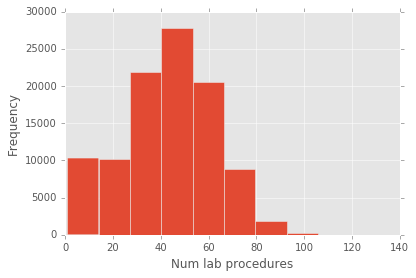

In [19]:
# histogram of num_lab_procedures 
hospital_set.num_lab_procedures.hist(bins=10)
plt.xlabel('Num lab procedures')
plt.ylabel('Frequency')

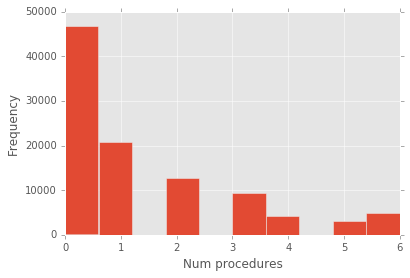

In [21]:
# histogram of num_procedures (shows the distribution of a numeric column)
hospital_set.num_procedures.hist(bins=10)
plt.xlabel('Num procedures')
plt.ylabel('Frequency')


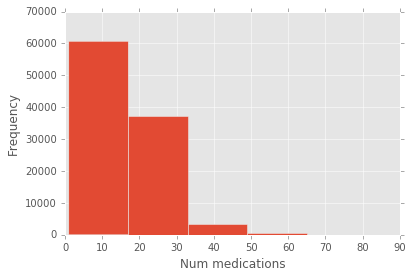

In [24]:
# histogram of num_medications (shows the distribution of a numeric column)
hospital_set.num_medications.hist(bins=5)
plt.xlabel('Num medications')
plt.ylabel('Frequency')

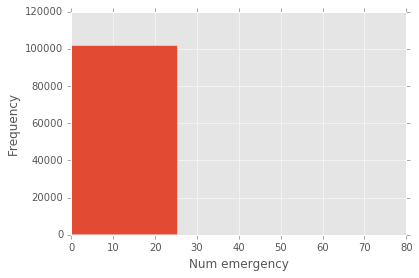

In [29]:
# histogram of number_emergency 
hospital_set.number_emergency.hist(bins=3)
plt.xlabel('Num emergency')
plt.ylabel('Frequency')

NameError: name 'time_in_hospital' is not defined

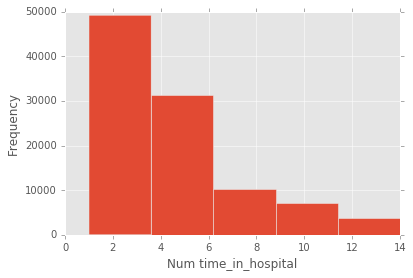

In [8]:
# histogram of time_in_hospital 
hospital_set.time_in_hospital.hist(bins=5)
plt.xlabel('Num time_in_hospital')
plt.ylabel('Frequency')

hospital_set.max(time_in_hospital)